# Spectral Clustering

### In spectral clustering, data points are treated as nodes of a graph. Thus, spectral clustering is a graph partitioning problem. The nodes are then mapped to a low-dimensional space that can be easily segregated to form clusters. No assumption is made about the shape/form of the clusters. The goal of spectral clustering is to cluster data that is connected but not necessarily compact or clustered within convex boundaries.

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
from sklearn.cluster import SpectralClustering 
from sklearn.preprocessing import StandardScaler, normalize 
from sklearn.decomposition import PCA 
from sklearn.metrics import silhouette_score 

In [15]:
raw_df = pd.read_csv('finalDataset.csv')

raw_df = raw_df.sample(n=10000, random_state=69)
withId = raw_df
raw_df = raw_df.drop('id', axis = 1) 
raw_df

,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year
890394,0,0.321,0.7670,4,-7.486,1,0.0343,0.002990,0.136000,0.1130,0.467,145.565,318693,4.0,2008
152161,0,0.574,0.4260,6,-10.751,1,0.0250,0.629000,0.000013,0.1640,0.470,77.446,216533,4.0,1973
1014856,0,0.353,0.2270,3,-19.124,0,0.0443,0.776000,0.000001,0.5660,0.219,119.966,159243,5.0,2020
459910,0,0.352,0.7890,0,-3.635,1,0.0404,0.567000,0.846000,0.0761,0.791,93.233,107507,4.0,2010
449202,0,0.638,0.7830,7,-6.649,1,0.0281,0.002270,0.000082,0.2560,0.750,120.258,166333,4.0,2004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546241,0,0.415,0.5410,7,-8.167,1,0.0312,0.034200,0.010800,0.4630,0.228,142.120,235013,4.0,2005
99598,0,0.000,0.2590,0,-13.614,1,0.0000,0.951000,0.000000,0.0000,0.000,0.000,5027,0.0,2007
1192073,0,0.470,0.7990,1,-6.060,1,0.0303,0.024400,0.953000,0.1050,0.486,144.918,169009,4.0,2019
1046486,0,0.330,0.0791,9,-15.352,0,0.0448,0.987000,0.000989,0.0928,0.102,74.939,245613,4.0,2019


In [16]:
# Preprocessing the data to make it visualizable 
  
# Scaling the Data 
scaler = StandardScaler() 
X_scaled = scaler.fit_transform(raw_df) 
  
# Normalizing the Data 
X_normalized = normalize(X_scaled) 
  
# Converting the numpy array into a pandas DataFrame 
X_normalized = pd.DataFrame(X_normalized) 
  
# Reducing the dimensions of the data 
pca = PCA(n_components = 2) 
X_principal = pca.fit_transform(X_normalized) 
X_principal = pd.DataFrame(X_principal) 
X_principal.columns = ['P1', 'P2'] 
  
X_principal.head(2) 

,P1,P2
0,-0.483298,0.185187
1,0.142307,-0.492542


> Building the clustering model and Visualizing the clustering

> Affinity = rbf

In [17]:
import joblib

# Building the clustering model 
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf') 
  
# Training the model and Storing the predicted cluster labels 
labels_rbf = spectral_model_rbf.fit_predict(X_principal)

modelFilename = 'spectral_model_rbf.joblib'
joblib.dump(spectral_model_rbf, modelFilename)

['spectral_model_rbf.joblib']

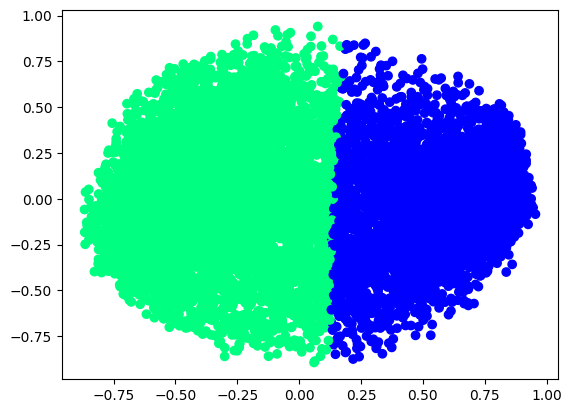

In [18]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = SpectralClustering(n_clusters = 2, affinity ='rbf') .fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

> Affinity = nearest neighbours

In [19]:
import joblib
#Building the clustering model 
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') 
  
# Training the model and Storing the predicted cluster labels 
labels_nn = spectral_model_nn.fit_predict(X_principal)

model_file_name = 'spectral_model_nn.joblib'
joblib.dump(spectral_model_nn, model_file_name)

['spectral_model_nn.joblib']

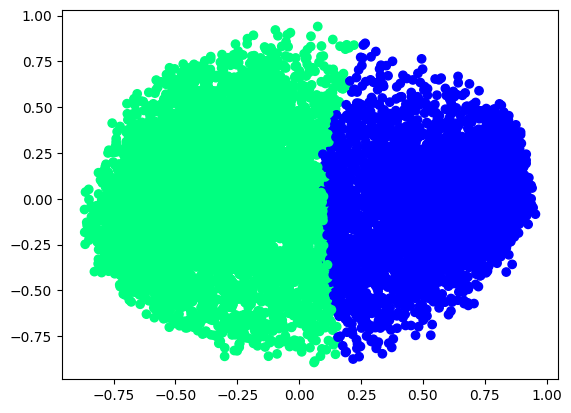

In [20]:
# Visualizing the clustering 
plt.scatter(X_principal['P1'], X_principal['P2'],  
           c = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors') .fit_predict(X_principal), cmap =plt.cm.winter) 
plt.show() 

> Performance Evaluation

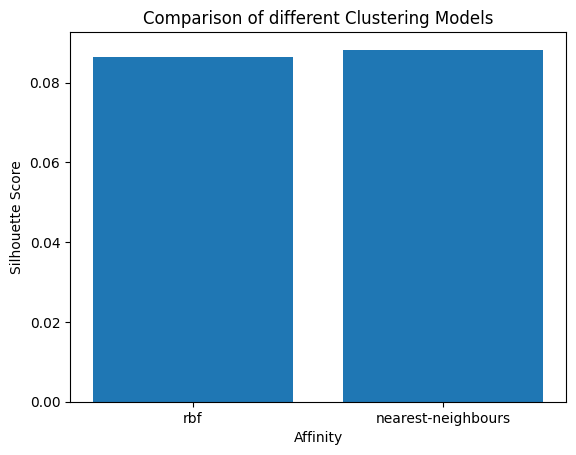

[0.08643304821444571, 0.0882458671315925]


In [21]:
# List of different values of affinity 
affinity = ['rbf', 'nearest-neighbours'] 
  
# List of Silhouette Scores 
s_scores = [] 
  
# Evaluating the performance 
s_scores.append(silhouette_score(raw_df, labels_rbf)) 
s_scores.append(silhouette_score(raw_df, labels_nn)) 
  
# Plotting a Bar Graph to compare the models 
plt.bar(affinity, s_scores) 
plt.xlabel('Affinity') 
plt.ylabel('Silhouette Score') 
plt.title('Comparison of different Clustering Models') 
plt.show() 

print(s_scores)

> Using Nearest Neighbours since it has better silhoutte score

In [23]:
withId['clusterLabel'] = spectral_model_nn.labels_
withId

,id,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,clusterLabel
890394,5Y1GAEMDm0yhbUMqe4chfn,0,0.321,0.7670,4,-7.486,1,0.0343,0.002990,0.136000,0.1130,0.467,145.565,318693,4.0,2008,0
152161,3WziO3x5pQRrwgs3SbrayN,0,0.574,0.4260,6,-10.751,1,0.0250,0.629000,0.000013,0.1640,0.470,77.446,216533,4.0,1973,1
1014856,4OV0PHPJEjZe0TOE1IabXv,0,0.353,0.2270,3,-19.124,0,0.0443,0.776000,0.000001,0.5660,0.219,119.966,159243,5.0,2020,1
459910,4NOTdZpyAP88vHMWtzbeL0,0,0.352,0.7890,0,-3.635,1,0.0404,0.567000,0.846000,0.0761,0.791,93.233,107507,4.0,2010,0
449202,4ByJ8xGdRuYHIzzFm0ki2P,0,0.638,0.7830,7,-6.649,1,0.0281,0.002270,0.000082,0.2560,0.750,120.258,166333,4.0,2004,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
546241,1gMIjuNaSpCp4hihMlqdEJ,0,0.415,0.5410,7,-8.167,1,0.0312,0.034200,0.010800,0.4630,0.228,142.120,235013,4.0,2005,0
99598,3jG5CQRMNgW0u6q9lf2vXu,0,0.000,0.2590,0,-13.614,1,0.0000,0.951000,0.000000,0.0000,0.000,0.000,5027,0.0,2007,1
1192073,4nJClyYlhRmcCmi3mqtngn,0,0.470,0.7990,1,-6.060,1,0.0303,0.024400,0.953000,0.1050,0.486,144.918,169009,4.0,2019,0
1046486,3z2gl3BWjrw9ECMCnISYjZ,0,0.330,0.0791,9,-15.352,0,0.0448,0.987000,0.000989,0.0928,0.102,74.939,245613,4.0,2019,1


In [26]:
def recommend_songs(input_song_id, num_recommendations=5):
    # Find the cluster label of the input song
    input_song_cluster = withId.loc[withId['id'] == input_song_id, 'clusterLabel'].values[0]

    # Extract songs from the same cluster, excluding the input song itself
    recommended_songs = withId.loc[withId['clusterLabel'] == input_song_cluster, 'id'].tolist()
    recommended_songs = [song_id for song_id in recommended_songs if song_id != input_song_id]

    # Return a specified number of recommended songs
    return recommended_songs[:num_recommendations]

In [27]:
input_song_id = '5Y1GAEMDm0yhbUMqe4chfn'  # Replace with an actual song ID from your dataset
recommended_songs = recommend_songs(input_song_id, num_recommendations=5)

# Display the recommended songs
print("Recommended Songs:")
print(recommended_songs)

Recommended Songs:
['4NOTdZpyAP88vHMWtzbeL0', '4ByJ8xGdRuYHIzzFm0ki2P', '30pZhnFrjrU5nBYo3lHtBi', '3cq1PXBEmVwtJaOfplbC53', '5KrVteEOPiX2NT2sX9oBSV']


In [5]:
import pandas as pd
recommended_songs= ['5Y1GAEMDm0yhbUMqe4chfn', '4NOTdZpyAP88vHMWtzbeL0', '4ByJ8xGdRuYHIzzFm0ki2P', '30pZhnFrjrU5nBYo3lHtBi', '3cq1PXBEmVwtJaOfplbC53', '5KrVteEOPiX2NT2sX9oBSV']
tmp = pd.read_csv('tracks_features.csv')
#list the songs with the above ids
tmp[tmp['id'].isin(recommended_songs)]

,id,name,album,album_id,artists,artist_ids,track_number,disc_number,explicit,danceability,...,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature,year,release_date
175798,3cq1PXBEmVwtJaOfplbC53,Transfixed,New Infection,66WFYR4w6SlTD47Y1XbJs0,['The Melismatics'],['1BO3rsBKcieRQMxRgx4Egi'],3,1,False,0.515,...,0.0625,0.004340,0.000000,0.0679,0.696,124.035,181400,4.0,2003,2003-11-26
449203,4ByJ8xGdRuYHIzzFm0ki2P,How Come It Takes So Long?,What's It All About,5WM1PXWZ6hI31te33F86jt,['Andrew'],['6YphLHJteTLE9Vgl1sIaQ6'],10,1,False,0.638,...,0.0281,0.002270,0.000082,0.2560,0.750,120.258,166333,4.0,2004,2004-10-11
459911,4NOTdZpyAP88vHMWtzbeL0,Skyway,Wish I'd Kept A Scrapbook - A Tribite to Tully...,1LyagrLglxctFjG75619Tm,['Gold-Bears'],['5i72QaC2fXBLSwIR16ehpO'],13,1,False,0.352,...,0.0404,0.567000,0.846000,0.0761,0.791,93.233,107507,4.0,2010,2010-08-31
641929,30pZhnFrjrU5nBYo3lHtBi,WORLD END,Flow Anime Best,7F1PK2xtWARCO52UmQcOgI,['FLOW'],['3w2HqkKa6upwuXEULtGvnY'],7,1,False,0.422,...,0.0567,0.000114,0.000000,0.3320,0.684,178.376,227920,4.0,2011,2011
890396,5Y1GAEMDm0yhbUMqe4chfn,You Are Love,Freestyle Family,2w3VHcftIJlfadYep74pjg,['The Soundscapes'],['0upbaI4kfuUL11MYnIxdM1'],7,1,False,0.321,...,0.0343,0.002990,0.136000,0.1130,0.467,145.565,318693,4.0,2008,2008-11-24
910076,5KrVteEOPiX2NT2sX9oBSV,La Revolera,"Clásicos de la Música Tropical Colombiana, Vol. 2",4UmBHCYMGIsUCnwauyRBbS,['John Lozano y Su Orquesto Mirave'],['392jHryYHWRusxKCU6flrT'],15,1,False,0.622,...,0.0400,0.722000,0.000000,0.0726,0.922,179.506,258547,3.0,2011,2011-12-20
